Here I have created a binary classifier by following section 3.4 of François Chollets's Deep learning with Python. The model will classify written movie reviews as either having possitive sentiment or negative.

The dataset is seperated into 25,000 items for training and 25,000 items for test as you never validate a model with data it was trained on. Each item is a variable length list of intergres in the range \[0, 1000) representing a key in the word dictionary. Here, the size of the word dictionary has been restricted the 10000 word occuring the most in the reviews.

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Intergers can't be feed into the model so the data needs to be converted into tensors. The simple way to do this is with 1-hot encoding

In [2]:
import numpy as np

def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15000/15000 [==============================] - 3s 193us/sample - loss: 0.5115 - acc: 0.7977 - val_loss: 0.3964 - val_acc: 0.8586
Epoch 2/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.3072 - acc: 0.9030 - val_loss: 0.3118 - val_acc: 0.8814
Epoch 3/20
15000/15000 [==============================] - 1s 98us/sample - loss: 0.2298 - acc: 0.9242 - val_loss: 0.2793 - val_acc: 0.8937
Epoch 4/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.1837 - acc: 0.9399 - val_loss: 0.2774 - val_acc: 0.8903
Epoch 5/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.1478 - acc: 0.9531 - val_loss: 0.2987 - val_acc: 0.8820
Epoch 6/20
15000/15000 [==============================] - 1s 98us/sample - loss: 0.1242 - acc: 0.9624 - val_loss: 0.2866 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 1s 99us/

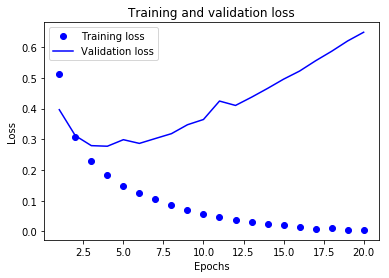

In [24]:
import matplotlib.pyplot as plt 

history_dict = history.history 
loss = history_dict['loss'] 
val_loss = history_dict['val_loss'] 

epochs = range(1, len(loss) + 1) 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend() 
plt.show()

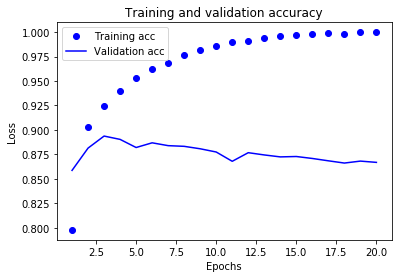

In [21]:
plt.clf() 
acc = history_dict['acc'] 
val_acc = history_dict['val_acc'] 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show()